In [55]:
import tensorflow as tf
from pathlib import Path
import os
import glob
import shutil
import matplotlib.pyplot as plt
import cv2 as cv
import random

In [56]:
data_set_path = Path(f'{Path.cwd()}/brain_tumor_dataset')
Path(data_set_path,'train')

WindowsPath('c:/Users/senanuk/Documents/brain-cnn/brain_tumor_dataset/train')

In [57]:
def img_from_dir_pipeline(dataPath):
    return tf.keras.utils.image_dataset_from_directory(
        data_set_path/dataPath,
        image_size = (300, 300 ),
        batch_size = 5
    )

train_dataset = img_from_dir_pipeline(Path(f'{data_set_path}/train'))
test_dataset = img_from_dir_pipeline(Path(f'{data_set_path}/test'))
validation_dataset = img_from_dir_pipeline(Path(f'{data_set_path}/validation'))

Found 177 files belonging to 2 classes.
Found 50 files belonging to 2 classes.
Found 26 files belonging to 2 classes.


In [58]:
data_augmentation = tf.keras.Sequential(
 [
 tf.keras.layers.RandomFlip("horizontal"),
 tf.keras.layers.RandomRotation(0.1),
 tf.keras.layers.RandomZoom(0.2),
 ]
)

In [59]:
def build_model():
    input_layer = tf.keras.layers.Input(shape=(300, 300, 3))
    # augmentedData = data_augmentation(input_layer)
    rescaleInputs = tf.keras.layers.Rescaling(1./255)(input_layer)
    convLayer = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu')(rescaleInputs)
    maxPoolLayer = tf.keras.layers.MaxPool2D(pool_size=2)(convLayer)
    convLayer = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu')(maxPoolLayer)
    maxPoolLayer = tf.keras.layers.MaxPool2D(pool_size=2)(convLayer)
    convLayer = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation='relu')(maxPoolLayer)
    flattenedLayer = tf.keras.layers.Flatten()(convLayer)
    outputLayer = tf.keras.layers.Dense(1, activation='sigmoid')(flattenedLayer)
    return tf.keras.Model(inputs=input_layer, outputs=outputLayer)
    

In [60]:
tensorboard_log_dir = Path(data_set_path,'logs')
callback_list = [
    tf.keras.callbacks.ModelCheckpoint(
        filepath= 'brain_cancer-model',
        monitor= 'val_loss',
        save_only_best= True
    ),
    tf.keras.callbacks.TensorBoard(
        log_dir=tensorboard_log_dir, 
        histogram_freq=1
    )
]

In [61]:
# compiling the model
model  = build_model()
model.compile(
    loss="binary_crossentropy",
    optimizer="rmsprop",
    metrics=["accuracy"],
)

In [62]:
%tensorboard --logdir tensorboard_log_dir
model.summary()

UsageError: Line magic function `%tensorboard` not found.


In [63]:
history = model.fit(
    train_dataset, 
    validation_data = validation_dataset,
    epochs=10,
    # learning_rate=0.001,
    callbacks= callback_list
)

Epoch 1/10
36/36 [==============================] - ETA: 0s - loss: 1.2156 - accuracy: 0.7062

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 11s 284ms/step - loss: 1.2156 - accuracy: 0.7062 - val_loss: 1.0050 - val_accuracy: 0.5769
Epoch 2/10
36/36 [==============================] - ETA: 0s - loss: 0.4755 - accuracy: 0.8079

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 14s 395ms/step - loss: 0.4755 - accuracy: 0.8079 - val_loss: 0.8618 - val_accuracy: 0.6923
Epoch 3/10
36/36 [==============================] - ETA: 0s - loss: 0.2554 - accuracy: 0.8814

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 15s 426ms/step - loss: 0.2554 - accuracy: 0.8814 - val_loss: 1.6507 - val_accuracy: 0.6923
Epoch 4/10
36/36 [==============================] - ETA: 0s - loss: 0.1940 - accuracy: 0.9322

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 17s 479ms/step - loss: 0.1940 - accuracy: 0.9322 - val_loss: 2.0652 - val_accuracy: 0.6923
Epoch 5/10
36/36 [==============================] - ETA: 0s - loss: 0.0785 - accuracy: 0.9661

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 17s 472ms/step - loss: 0.0785 - accuracy: 0.9661 - val_loss: 3.7261 - val_accuracy: 0.6538
Epoch 6/10
36/36 [==============================] - ETA: 0s - loss: 0.0565 - accuracy: 0.9661

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 16s 448ms/step - loss: 0.0565 - accuracy: 0.9661 - val_loss: 2.8530 - val_accuracy: 0.6923
Epoch 7/10
36/36 [==============================] - ETA: 0s - loss: 0.0164 - accuracy: 0.9944

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 16s 449ms/step - loss: 0.0164 - accuracy: 0.9944 - val_loss: 3.7793 - val_accuracy: 0.6923
Epoch 8/10
36/36 [==============================] - ETA: 0s - loss: 3.3177e-05 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 17s 469ms/step - loss: 3.3177e-05 - accuracy: 1.0000 - val_loss: 4.2450 - val_accuracy: 0.6538
Epoch 9/10
36/36 [==============================] - ETA: 0s - loss: 0.3791 - accuracy: 0.9831

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 19s 524ms/step - loss: 0.3791 - accuracy: 0.9831 - val_loss: 2.5326 - val_accuracy: 0.6154
Epoch 10/10
36/36 [==============================] - ETA: 0s - loss: 7.3075e-04 - accuracy: 1.0000

INFO:tensorflow:Assets written to: brain_cancer-model\assets


INFO:tensorflow:Assets written to: brain_cancer-model\assets


36/36 [==============================] - 17s 479ms/step - loss: 7.3075e-04 - accuracy: 1.0000 - val_loss: 3.1685 - val_accuracy: 0.6538


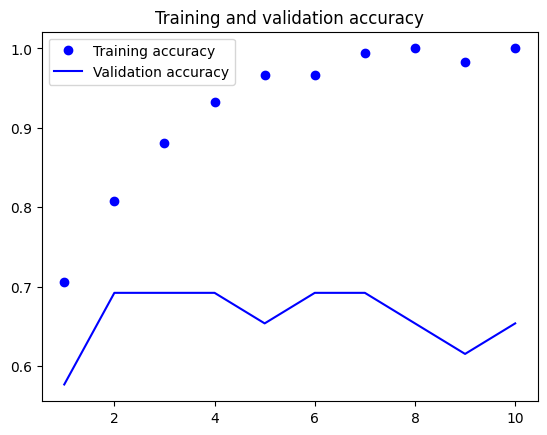

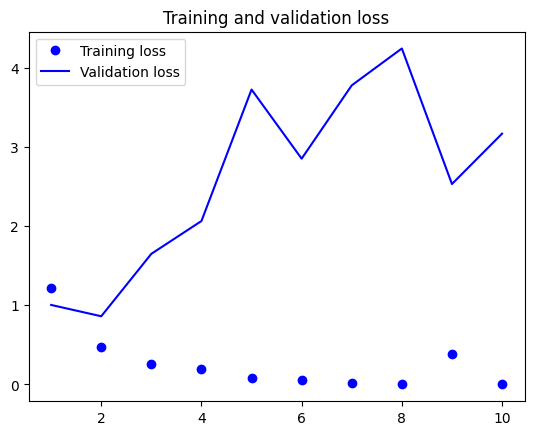

In [64]:
accuracy = history.history["accuracy"]
val_accuracy = history.history["val_accuracy"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()